You would need to do eda, scoring model, docker, streamlit and full github documentation

Note to myslef:
*   ydata Profile
*   TPOT
*   H2O AutoML


'NM' in Payment_of_Min_Amount

I believe the Num_of_Delayed_Payment feature tells you that Person X had to pay for Y but did not. And if the person X failed to pay Y a number of n times then n is the Num_of_Delayed_Payment

DATA OVERVIEW

'id': A unique identifier for each data record.

'customer_id': An identifier for each customer, allowing you to associate multiple records with the same individual.

'month': The month of the data record, indicating when the data was collected or relevant.

'name': The name of the customer, which may be used for identification purposes.

'age': The age of the customer, providing information about their age demographic.

'ssn': The Social Security Number (SSN) of the customer, a unique identifier used for verification.

'occupation': The occupation or profession of the customer, which can help understand their employment status.

'annual_income': The annual income of the customer, a crucial financial parameter.

'monthly_inhand_salary': The monthly salary or income available to the customer after deductions.

'num_bank_accounts': The number of bank accounts held by the customer, indicating their banking activity.

'num_credit_card': The number of credit cards held by the customer, reflecting their credit usage.

'interest_rate': The interest rate associated with the customer's financial products, such as loans or credit cards.

'num_of_loan': The number of loans the customer has, providing insight into their debt obligations.

'type_of_loan': The types of loans the customer holds, which can include mortgages, personal loans, etc.

'delay_from_due_date': The delay in payment from the due date for loans or credit cards, indicating their payment behavior.

'num_of_delayed_payment': The number of delayed payments made by the customer.

'changed_credit_limit': Changes in the customer's credit limit, which can affect their credit utilization.

'num_credit_inquiries': The number of credit inquiries made by the customer, potentially affecting their credit score.

'credit_mix': The composition of the customer's credit accounts, which can impact their credit profile.

'outstanding_debt': The amount of outstanding debt owed by the customer.

'credit_utilization_ratio': The ratio of credit used to the total available credit, a key factor in credit scoring.

'credit_history_age': The age of the customer's credit history, influencing their creditworthiness.

'payment_of_min_amount': How customers handle the minimum payment amount on credit cards or loans.

'total_emi_per_month': The total Equated Monthly Installment (EMI) payments made by the customer.

'amount_invested_monthly': The amount the customer invests on a monthly basis, if applicable.

'payment_behaviour': The behavior of the customer regarding their payments, reflecting their financial responsibility.

'monthly_balance': The monthly balance in the customer's financial accounts.

'credit_score': The target variable representing the customer's credit score, which we aim to predict.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
# from ydata_profiling import ProfileReport

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/credit-score-classification


In [7]:
!ls -la /kaggle/input/credit-score-classification

total 45420
drwxr-sr-x 2 1000 1000        0 Sep  4 11:28 .
drwxr-xr-x 3 root root     4096 Sep  4 11:28 ..
-rw-r--r-- 1 1000 1000 15366486 Sep  4 11:28 test.csv
-rw-r--r-- 1 1000 1000 31136044 Sep  4 11:28 train.csv


In [8]:
# profile = ProfileReport(train_df, title="My Data Profile Report")
# profile.to_notebook_iframe()

In [9]:
train_path = "/kaggle/input/credit-score-classification/train.csv"
test_path = "/kaggle/input/credit-score-classification/test.csv"

train_df = pd.read_csv(train_path)
# test_df = pd.read_csv(test_path)

In [10]:
train_df.columns = train_df.columns.str.lower()

In [80]:
train_df.head(10)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


# Data Cleaning

Columns to drop:


*   id
*   customer_id --> repetitive value
*   name --> repetitive value
*   ssn --> informal feature only

may be

* month --> assume each month(raw) evaluated sperately
* type_of_Loan --> repetitive value



In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      90015 non-null   object 
 4   age                       100000 non-null  object 
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  object 
 8   monthly_inhand_salary     84998 non-null   float64
 9   num_bank_accounts         100000 non-null  int64  
 10  num_credit_card           100000 non-null  int64  
 11  interest_rate             100000 non-null  int64  
 12  num_of_loan               100000 non-null  object 
 13  type_of_loan              88592 non-null   ob

In [90]:
col_to_drop = ['id','name', 'ssn']
train_df_new = train_df.drop(col_to_drop, axis=1)

## General Operations

Replance all random and na values with np.nan to ensure consistency when perform another operations. Also fix data type for numeric columns.

In [91]:
train_df_new = train_df_new.applymap(
  lambda x: x if x is np.nan or not \
    isinstance(x, str) else str(x).strip('_')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.nan)

train_df_new['age'] = train_df_new['age'].astype(int)
train_df_new['annual_income'] = train_df_new['annual_income'].astype(float)
train_df_new['num_of_loan'] = train_df_new['num_of_loan'].astype(int)
train_df_new['num_of_delayed_payment'] = train_df_new['num_of_delayed_payment'].astype(float)
train_df_new['changed_credit_limit'] = train_df_new['changed_credit_limit'].astype(float)
train_df_new['outstanding_debt'] = train_df_new['outstanding_debt'].astype(float)
train_df_new['amount_invested_monthly'] = train_df_new['amount_invested_monthly'].astype(float)
train_df_new['monthly_balance'] = train_df_new['monthly_balance'].astype(float)

For the other columns which data type is object. I make sure they have the same format also.

In [92]:
string_columns = list(train_df_new.dtypes[train_df_new.dtypes == 'object'].index)

for col in string_columns:
    train_df_new[col] = train_df_new[col].str.lower().str.replace(' ', '_')

I notice some entries in occupation column have na value so I replace them by grouping them by customer_id and fill them with backward of forward value

In [93]:
# Fill within customer groups first
train_df_new['occupation'] = train_df_new.groupby('customer_id')['occupation'].fillna(method='ffill')
train_df_new['occupation'] = train_df_new.groupby('customer_id')['occupation'].fillna(method='bfill')

## Fixing age missing values

Searching in Age column I found that youngest age is 14 working as developer and the oldest customer are around 50 so I set the limit to 60

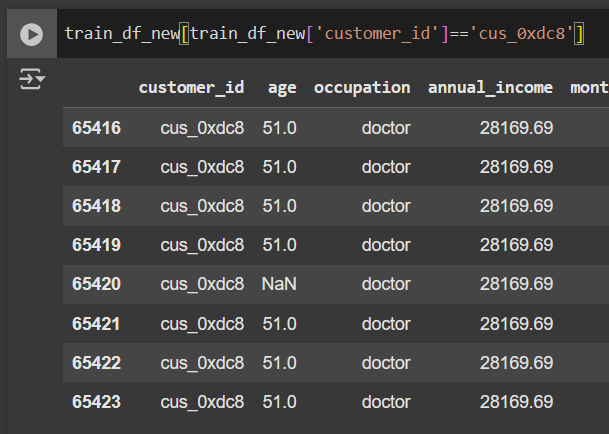

In [95]:
# Set unreasonable ages to NaN -- youngest age is 14 working as developer -- old customer are around 50 to 60
train_df_new.loc[(train_df_new['age'] < 14) | (train_df_new['age'] > 60), 'age'] = np.nan

# Fill within customer groups
train_df_new['age'] = train_df_new.groupby('customer_id')['age'].fillna(method='ffill').fillna(method='bfill')

## Fixing credit_history_age

Transformation happened here is happened --> (year * 12) + month

Then for na and nan values I group by them and loop over the group to try fill it correctly (increment or decrement)

In [96]:
def year_month(x):
    if pd.isna(x) or str(x).lower() == 'na':
        return np.nan

    # Clean the string and split by 'and'
    parts = str(x).replace('_', ' ').split(' and ')

    # Extract years and months
    years = int(parts[0].split(' ')[0]) * 12  # first number before 'years'
    months = int(parts[1].split(' ')[0])     # first number before 'months'

    return years + months


train_df_new['credit_history_age'] = train_df_new['credit_history_age'].replace({'na': np.nan})
train_df_new['credit_history_age'] = train_df_new['credit_history_age'].apply(year_month)

In [97]:
def fill_credit_history_sequential(group):
    """Fill missing credit history values considering monthly progression"""
    group = group.copy()

    # Sort by month order (assuming you have month info or can infer sequence)
    # For now, assuming the data is already in chronological order

    # Forward fill then add progression
    for i in range(1, len(group)):
        if pd.isna(group.iloc[i]) and not pd.isna(group.iloc[i-1]):
            group.iloc[i] = group.iloc[i-1] + 1

    # Backward fill then subtract progression
    for i in range(len(group)-2, -1, -1):
        if pd.isna(group.iloc[i]) and not pd.isna(group.iloc[i+1]):
            group.iloc[i] = group.iloc[i+1] - 1

    return group

# Apply the sequential filling
train_df_new['credit_history_age'] = train_df_new.groupby('customer_id')['credit_history_age'].apply(fill_credit_history_sequential).reset_index(level=0, drop=True)

In [109]:
train_df_new['type_of_loan'].value_counts()

,count
type_of_loan,
not_specified,1408
credit-builder_loan,1280
personal_loan,1272
debt_consolidation_loan,1264
student_loan,1240
...,...
"debt_consolidation_loan,_personal_loan,_mortgage_loan,_personal_loan,_not_specified,_mortgage_loan,_and_home_equity_loan",8
"student_loan,_home_equity_loan,_student_loan,_personal_loan,_not_specified,_auto_loan,_auto_loan,_and_debt_consolidation_loan",8
"not_specified,_auto_loan,_auto_loan,_and_debt_consolidation_loan",8


In [107]:
train_df_new[train_df_new['type_of_loan']=='not_specified'].head(50)

,customer_id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
24,cus_0xb891,january,54.0,entrepreneur,30689.89,2612.490833,2,5,4,1,not_specified,0,6.0,1.99,4.0,good,632.46,26.544229,207.0,no,16.415452,81.228859,low_spent_large_value_payments,433.604773,standard
25,cus_0xb891,february,54.0,entrepreneur,30689.89,2612.490833,2,5,4,1,not_specified,5,3.0,1.99,4.0,good,632.46,35.279982,208.0,no,16.415452,124.881820,low_spent_small_value_payments,409.951812,standard
26,cus_0xb891,march,55.0,entrepreneur,30689.89,2612.490833,2,5,4,1,not_specified,3,9.0,1.99,4.0,good,632.46,32.301163,209.0,nm,16.415452,83.406509,high_spent_medium_value_payments,411.427123,standard
27,cus_0xb891,april,55.0,entrepreneur,30689.89,2612.490833,2,5,4,1,not_specified,7,6.0,-2.01,4.0,good,632.46,38.132348,210.0,no,16.415452,272.334037,low_spent_small_value_payments,262.499594,standard
28,cus_0xb891,may,55.0,entrepreneur,30689.89,2612.490833,2,5,4,1,not_specified,5,6.0,-1.01,4.0,good,632.46,41.154317,211.0,no,16.415452,10000.000000,low_spent_large_value_payments,359.374916,standard
29,cus_0xb891,june,55.0,entrepreneur,30689.89,2612.490833,2,5,4,1,not_specified,5,6.0,-3.01,4.0,NaN,632.46,27.445422,212.0,no,16.415452,84.952848,high_spent_small_value_payments,419.880784,standard
30,cus_0xb891,july,55.0,entrepreneur,30689.89,2612.490833,2,5,4,1,not_specified,5,NaN,1.99,4.0,good,632.46,26.056395,213.0,no,16.415452,71.283675,low_spent_large_value_payments,443.549957,standard
31,cus_0xb891,august,55.0,entrepreneur,30689.89,2612.490833,2,5,4,-100,not_specified,4,9.0,1.99,4.0,good,632.46,27.332515,214.0,no,16.415452,125.617251,high_spent_small_value_payments,379.216381,standard
280,cus_0x9b94,january,36.0,manager,71681.40,5799.450000,3,518,15,1,not_specified,7,8.0,10.44,NaN,NaN,1293.02,40.339024,307.0,yes,53.923514,301.292082,low_spent_small_value_payments,514.729404,standard
281,cus_0x9b94,february,36.0,manager,71681.40,5799.450000,3,6,15,1,not_specified,8,6.0,10.44,0.0,standard,1293.02,29.682954,308.0,yes,53.923514,137.331143,high_spent_medium_value_payments,638.690343,standard


In [70]:
na_col = ['customer_id','type_of_loan','monthly_inhand_salary','num_of_delayed_payment','changed_credit_limit','num_credit_inquiries','credit_mix','amount_invested_monthly','payment_behaviour','monthly_balance']

In [74]:
train_df_new[na_col].head(50)

,customer_id,monthly_inhand_salary,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,amount_invested_monthly,payment_behaviour,monthly_balance
0,cus_0xd40,1824.843333,7.0,11.27,4.0,NaN,80.415295,high_spent_small_value_payments,312.494089
1,cus_0xd40,NaN,NaN,11.27,4.0,good,118.280222,low_spent_large_value_payments,284.629162
2,cus_0xd40,NaN,7.0,NaN,4.0,good,81.699521,low_spent_medium_value_payments,331.209863
3,cus_0xd40,NaN,4.0,6.27,4.0,good,199.458074,low_spent_small_value_payments,223.451310
4,cus_0xd40,1824.843333,NaN,11.27,4.0,good,41.420153,high_spent_medium_value_payments,341.489231
5,cus_0xd40,NaN,4.0,9.27,4.0,good,62.430172,NaN,340.479212
6,cus_0xd40,1824.843333,8.0,11.27,4.0,good,178.344067,low_spent_small_value_payments,244.565317
7,cus_0xd40,1824.843333,6.0,11.27,4.0,good,24.785217,high_spent_medium_value_payments,358.124168
8,cus_0x21b1,3037.986667,4.0,5.42,2.0,good,104.291825,low_spent_small_value_payments,470.690627
9,cus_0x21b1,3037.986667,1.0,7.42,2.0,good,40.391238,high_spent_large_value_payments,484.591214


In [98]:
print(train_df_new[na_col].isnull().sum())
print(50*'-')
print(train_df_new[na_col].info())

customer_id                    0
monthly_inhand_salary      15002
num_of_delayed_payment      7002
changed_credit_limit        2091
num_credit_inquiries        1965
credit_mix                 20195
amount_invested_monthly     4479
payment_behaviour           7600
monthly_balance             1200
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   customer_id              100000 non-null  object 
 1   monthly_inhand_salary    84998 non-null   float64
 2   num_of_delayed_payment   92998 non-null   float64
 3   changed_credit_limit     97909 non-null   float64
 4   num_credit_inquiries     98035 non-null   float64
 5   credit_mix               79805 non-null   object 
 6   amount_invested_monthly  95521 non-null   float64
 7   payment_behaviour        92400